# Predicting Revenue for Apprentice Chef (Regression) 

## Business Case:

Apprentice Chef provides gourmet meals which require minimal cooking. They can be ordered through online platform or mobile application. The meals are targeted towards San Francisco working professionals who want to have healthy food but do not have enough time to prepare it. Apprentice Chef has collected customer data over the past year and wants to leverage it to predict revenue. We will be build various statistical models centered around this objective and select the best one based on performance. 

In [2]:
##############################################################################
"""                  Importing libraries and Dataset                       """
##############################################################################

import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import statsmodels.formula.api as smf # predictive modeling with nice outputs
import random as rand # random number generation
import gender_guesser.detector as gender # guess gender based on (given) name
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
import sklearn.linear_model # linear models

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
apprentice = pd.read_excel(io=file)

In [3]:
##############################################################################
"""                     User Defined Functions                             """
##############################################################################

# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

The customer data collected contains data from 1946 customers. This data provides us 30 features for each customer including revenue. We shall further examine this data.

In [4]:
##############################################################################
"""                  Dimensions of the Dataset                             """
##############################################################################
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {apprentice.shape[0]}
Features:     {apprentice.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     30



## Cleaning and Exploring the data:

We have received information that the feature 'LARGEST_ORDER_SIZE' was mislabelled. It should actually be called 'AVERAGE_ORDER_SIZE'. Lets fix it.

In [5]:
##############################################################################
"""                  Renaming mislabelled feature                          """
##############################################################################
# The column LARGEST_ORDER_SIZE was mislabelled. It is the average order size of the customer.
apprentice = apprentice.rename(columns={'LARGEST_ORDER_SIZE':'AVERAGE_ORDER_SIZE'})

Let us analyze the distribution of the data under each feature so that we can visually classify them as:

Continuous : These features have infinite number of values between two data points, for example time.

Categorical: Unlike continuous features, these have finite groups. They might not be logically ordered.

Discrete: Like categorical, these have distinct groups but they are numeric and are countable.


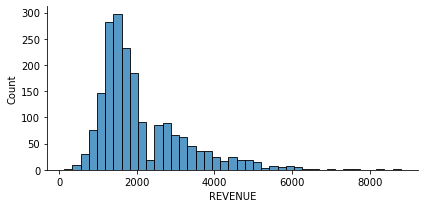

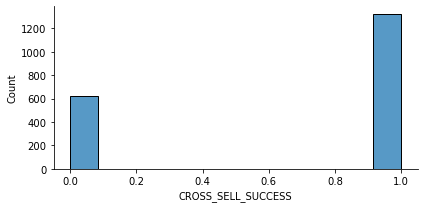

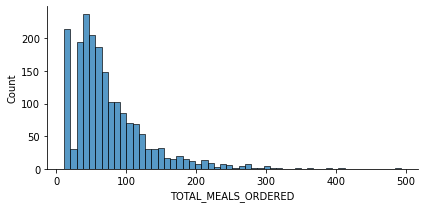

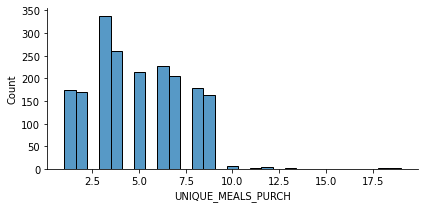

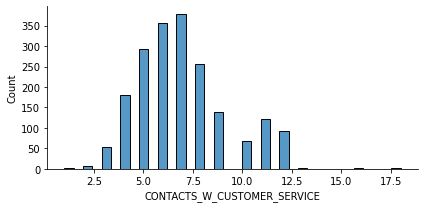

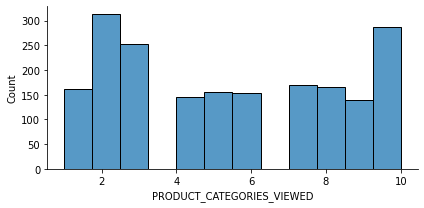

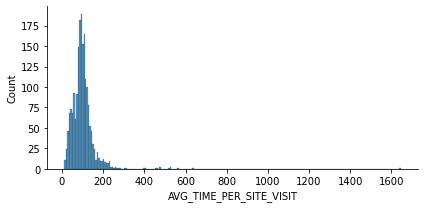

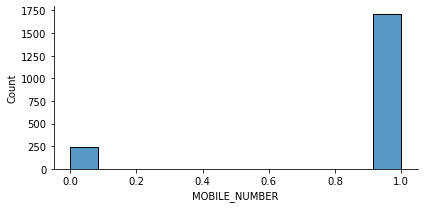

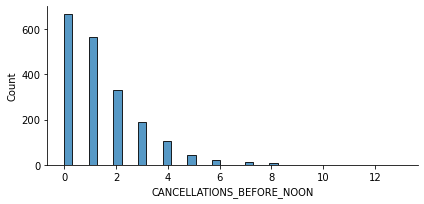

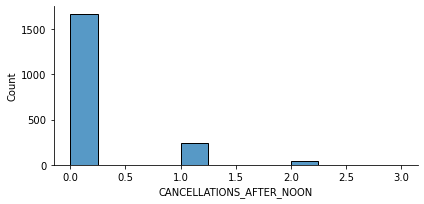

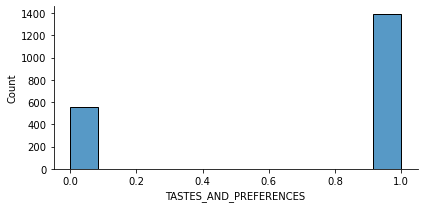

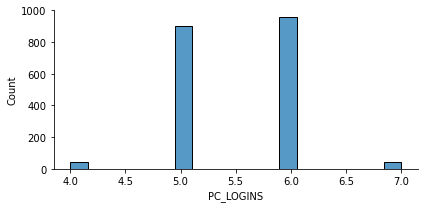

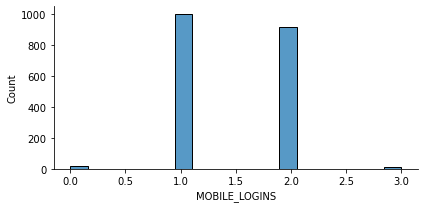

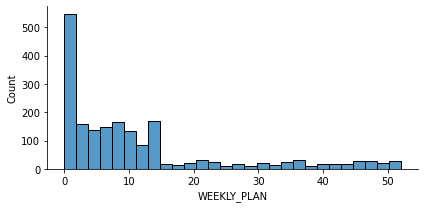

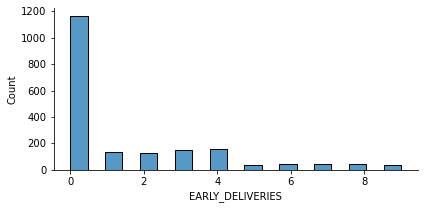

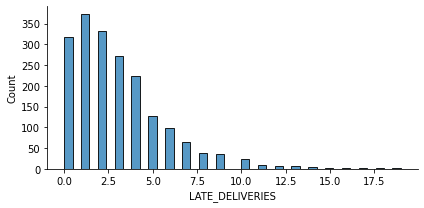

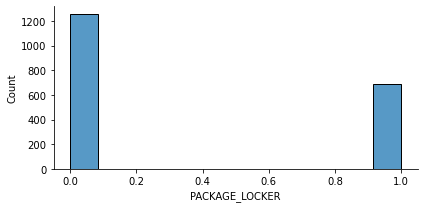

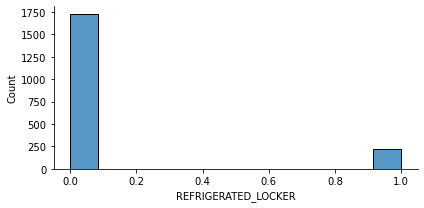

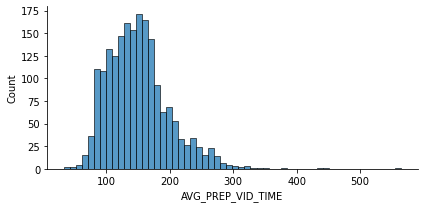

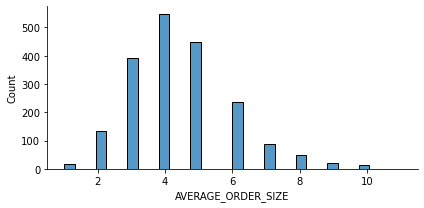

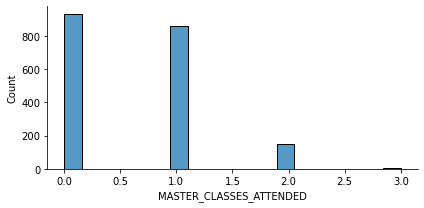

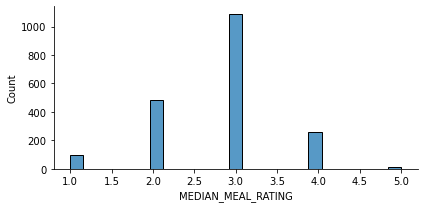

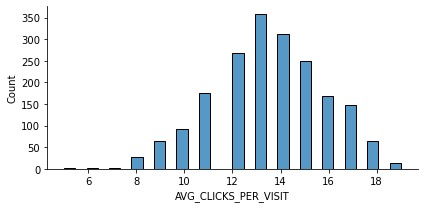

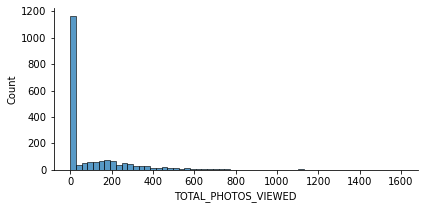

In [6]:
##############################################################################
"""                Analyzing distribution of data for features             """
##############################################################################

# Creating a list of column names except for categorical and qualitative
all_variables = ['REVENUE', 'CROSS_SELL_SUCCESS',
                 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 
                 'CONTACTS_W_CUSTOMER_SERVICE',  'PRODUCT_CATEGORIES_VIEWED',
                 'AVG_TIME_PER_SITE_VISIT',  'MOBILE_NUMBER', 
                 'CANCELLATIONS_BEFORE_NOON',  'CANCELLATIONS_AFTER_NOON',
                 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 
                 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 
                 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER',  'AVG_PREP_VID_TIME',
                 'AVERAGE_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 
                 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED']

# Creating a loop for finding out the distributions of each feature in all_variables
# This exercise is done to determine if the feature is continuous or an interval

for x in all_variables:
     
    # developing a histogram using DISPLOT
    sns.displot(data   = apprentice,
                x      = apprentice[x],
                height = 3,
                aspect = 2)
    plt.show() 
    
    


Let us analyze the continuous features first. We shall measure the correlation of continuous features with revenue to identify important features.

The top continuous correlated features are:

    AVG_PREP_VID_TIME              0.64
    TOTAL_MEALS_ORDERED            0.60
    TOTAL_PHOTOS_VIEWED            0.47
    AVERAGE_ORDER_SIZE             0.44


In [7]:
##############################################################################
"""                Correlation of Continuous features                      """
##############################################################################
# Feature engineering for Continuos variables
#----------------------------------------------

# creating a list of continuous features (including REVENUE)
continuous_data = ['REVENUE','CROSS_SELL_SUCCESS','TOTAL_MEALS_ORDERED',
                   'UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE',
                   'AVG_TIME_PER_SITE_VISIT','MOBILE_NUMBER','CANCELLATIONS_BEFORE_NOON',
                   'CANCELLATIONS_AFTER_NOON','TASTES_AND_PREFERENCES','PC_LOGINS',
                   'MOBILE_LOGINS','EARLY_DELIVERIES','LATE_DELIVERIES','PACKAGE_LOCKER',
                   'REFRIGERATED_LOCKER','AVG_PREP_VID_TIME','AVERAGE_ORDER_SIZE',
                   'AVG_CLICKS_PER_VISIT','TOTAL_PHOTOS_VIEWED']


# developing a correlation matrix based on continuous features
apprentice_corr = apprentice[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with REVENUE
apprentice_corr.loc[ : , 'REVENUE'].round(decimals = 2).sort_values(ascending = False)

# The top continuous correlated features are: 
""" AVG_PREP_VID_TIME              0.64
    TOTAL_MEALS_ORDERED            0.60
    TOTAL_PHOTOS_VIEWED            0.47
    AVERAGE_ORDER_SIZE             0.44"""


' AVG_PREP_VID_TIME              0.64\n    TOTAL_MEALS_ORDERED            0.60\n    TOTAL_PHOTOS_VIEWED            0.47\n    AVERAGE_ORDER_SIZE             0.44'

Let us transform the revenue using log transformation so that we can create a more uniform distribution. This helps us express the large range of revenue in a better manner.

In [19]:
##############################################################################
"""                    Log transformation of Revenue                       """
##############################################################################
# log transforming REVENUE and saving it to the dataset
apprentice['log_REVENUE'] = np.log10(apprentice['REVENUE'])


Let us identify any missing values in the dataset.

In [20]:
##############################################################################
"""                    Identification of missing values                    """
##############################################################################
# Finding null values in the dataset
apprentice.isnull().sum()

Unnamed: 0                     0
REVENUE                        0
CROSS_SELL_SUCCESS             0
NAME                           0
EMAIL                          0
FIRST_NAME                     0
FAMILY_NAME                    0
TOTAL_MEALS_ORDERED            0
UNIQUE_MEALS_PURCH             0
CONTACTS_W_CUSTOMER_SERVICE    0
PRODUCT_CATEGORIES_VIEWED      0
AVG_TIME_PER_SITE_VISIT        0
MOBILE_NUMBER                  0
CANCELLATIONS_BEFORE_NOON      0
CANCELLATIONS_AFTER_NOON       0
TASTES_AND_PREFERENCES         0
PC_LOGINS                      0
MOBILE_LOGINS                  0
WEEKLY_PLAN                    0
EARLY_DELIVERIES               0
LATE_DELIVERIES                0
PACKAGE_LOCKER                 0
REFRIGERATED_LOCKER            0
AVG_PREP_VID_TIME              0
AVERAGE_ORDER_SIZE             0
MASTER_CLASSES_ATTENDED        0
MEDIAN_MEAL_RATING             0
AVG_CLICKS_PER_VISIT           0
TOTAL_PHOTOS_VIEWED            0
m_FAMILY_NAME                  0
log_REVENU

Let us flag all the missing values by creating new columns. The columns will be binary where the observation which has a missing value will be assigned the value of 1.

In [21]:
##############################################################################
"""                    Log transformation of Revenue                       """
##############################################################################
# Family name has 47 null values
# looping to detect features with missing values
for col in apprentice:

    # creating columns with 1s if missing and 0 if not
    if apprentice[col].isnull().astype(int).sum() > 0:
        apprentice['m_'+col] = apprentice[col].isnull().astype(int)

#summing the missing value flags to check the results of the loop above
apprentice[    ['m_FAMILY_NAME']    ].sum(axis = 0)

m_FAMILY_NAME    47
dtype: int64

FAMILY_NAME is the only column with missing values. It seems that the family name is fetched from the email. We shall
rename these observations as 'Not in Email'.

In [22]:
##############################################################################
"""                    Imputation for missing values                       """
##############################################################################

# It seems that the last name is fetched from the email.
# Since for the above observations the email does not reflect the last name, we shall
# rename these observations as Not in Email
fill = 'Not in email'
apprentice['FAMILY_NAME'] = apprentice['FAMILY_NAME'].fillna(fill)

In [23]:
# Confirming if there are no null values
apprentice.isnull().any().any()

False

Though there are no more missing values, there might be features having several observations with zero value. They can misrepresent the data. Hence we will identify them visually using scatter plots. 

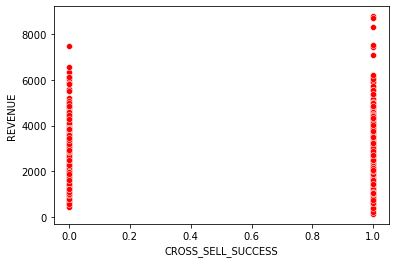

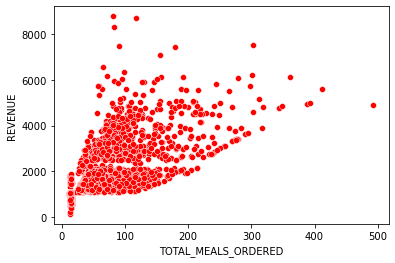

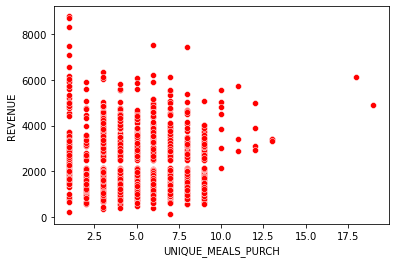

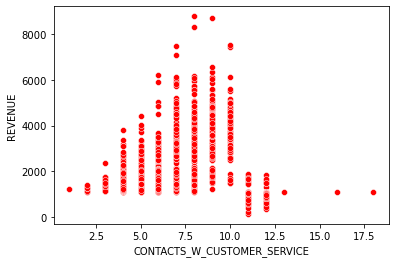

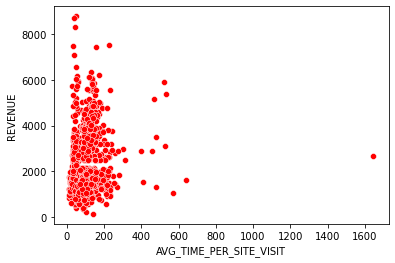

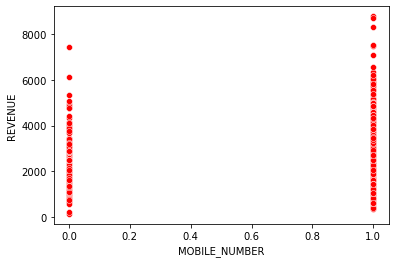

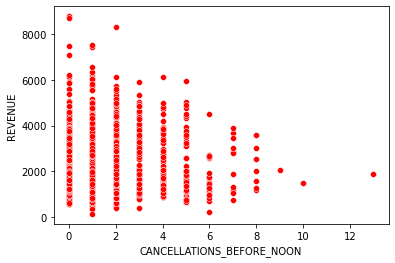

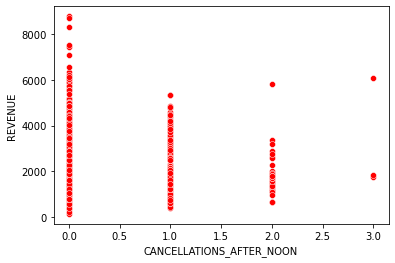

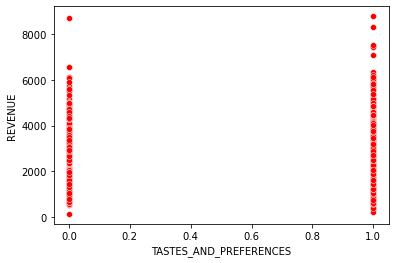

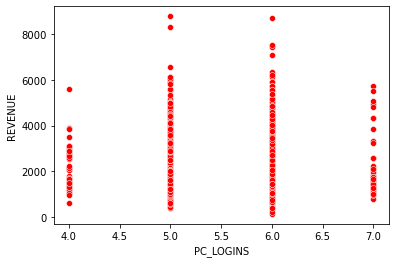

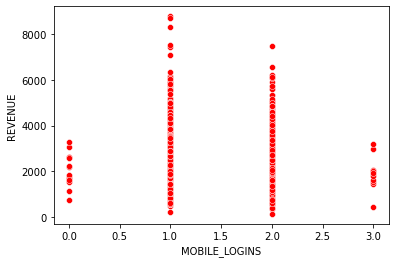

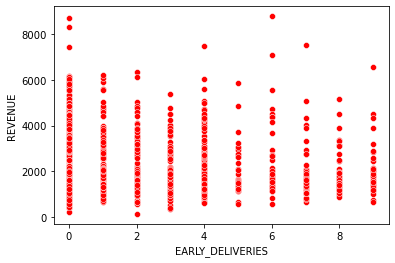

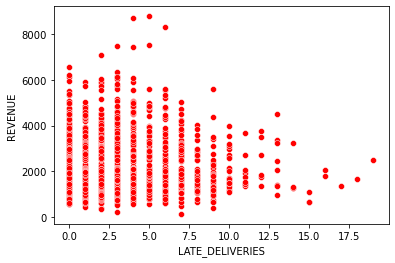

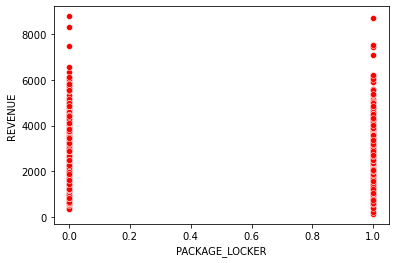

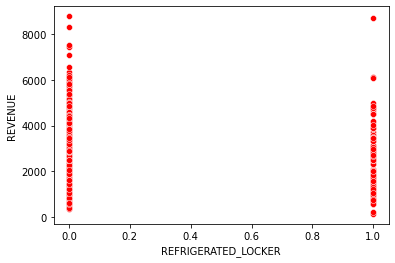

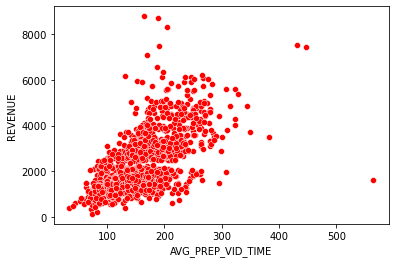

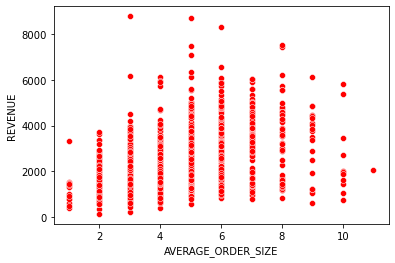

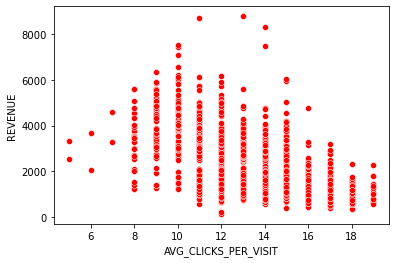

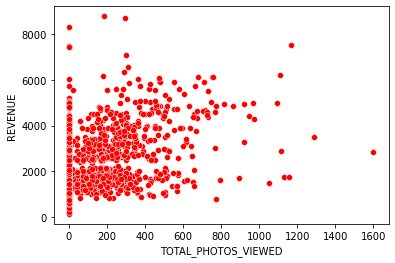

In [24]:
##############################################################################
"""                    Identifying zeros in the features                   """
##############################################################################

# Dropping REVENUE from continuous data list and 
# forming a list for independant continous variables
x_continuous_data = ['CROSS_SELL_SUCCESS','TOTAL_MEALS_ORDERED',
                   'UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE',
                   'AVG_TIME_PER_SITE_VISIT','MOBILE_NUMBER','CANCELLATIONS_BEFORE_NOON',
                   'CANCELLATIONS_AFTER_NOON','TASTES_AND_PREFERENCES','PC_LOGINS',
                   'MOBILE_LOGINS','EARLY_DELIVERIES','LATE_DELIVERIES','PACKAGE_LOCKER',
                   'REFRIGERATED_LOCKER','AVG_PREP_VID_TIME','AVERAGE_ORDER_SIZE',
                   'AVG_CLICKS_PER_VISIT','TOTAL_PHOTOS_VIEWED']


# Creating scatterplots to visualize zeroes in continuous data

for x in x_continuous_data:
    plt.subplot(1, 1, 1)
    sns.scatterplot(x = apprentice[x],
                y= apprentice['REVENUE'],
                color = 'r')


# adding labels but not adding title
    plt.xlabel(xlabel = x)
    plt.ylabel(ylabel = 'REVENUE')
    plt.show()
   
    

We can see that there are many zero value observations in features. Let us count the number of zeros in these features. 

In [25]:
##############################################################################
"""                    Counting zeros in the features                   """
##############################################################################
# counting the number of zeroes for continuous data variables
CROSS_SELL_SUCCESS_zeroes   = len(apprentice['CROSS_SELL_SUCCESS'][apprentice['CROSS_SELL_SUCCESS']== 0]) # CROSS_SELL_SUCCESS
TOTAL_MEALS_ORDERED_zeroes   = len(apprentice['TOTAL_MEALS_ORDERED'][apprentice['TOTAL_MEALS_ORDERED']== 0]) # TOTAL_MEALS_ORDERED
UNIQUE_MEALS_PURCH_zeroes   = len(apprentice['UNIQUE_MEALS_PURCH'][apprentice['UNIQUE_MEALS_PURCH']== 0]) # UNIQUE_MEALS_PURCH
CONTACTS_W_CUSTOMER_SERVICE_zeroes   = len(apprentice['CONTACTS_W_CUSTOMER_SERVICE'][apprentice['CONTACTS_W_CUSTOMER_SERVICE']== 0]) # CONTACTS_W_CUSTOMER_SERVICE
AVG_TIME_PER_SITE_VISIT_zeroes   = len(apprentice['AVG_TIME_PER_SITE_VISIT'][apprentice['AVG_TIME_PER_SITE_VISIT']== 0]) # AVG_TIME_PER_SITE_VISIT
MOBILE_NUMBER_zeroes   = len(apprentice['MOBILE_NUMBER'][apprentice['MOBILE_NUMBER']== 0]) # MOBILE_NUMBER
CANCELLATIONS_BEFORE_NOON_zeroes   = len(apprentice['CANCELLATIONS_BEFORE_NOON'][apprentice['CANCELLATIONS_BEFORE_NOON']== 0]) # CANCELLATIONS_BEFORE_NOON
CANCELLATIONS_AFTER_NOON_zeroes   = len(apprentice['CANCELLATIONS_AFTER_NOON'][apprentice['CANCELLATIONS_AFTER_NOON']== 0]) # CANCELLATIONS_AFTER_NOON
TASTES_AND_PREFERENCES_zeroes   = len(apprentice['TASTES_AND_PREFERENCES'][apprentice['TASTES_AND_PREFERENCES']== 0]) # TASTES_AND_PREFERENCES
PC_LOGINS_zeroes   = len(apprentice['PC_LOGINS'][apprentice['PC_LOGINS']== 0]) # PC_LOGINS
MOBILE_LOGINS_zeroes   = len(apprentice['MOBILE_LOGINS'][apprentice['MOBILE_LOGINS']== 0]) # MOBILE_LOGINS
EARLY_DELIVERIES_zeroes   = len(apprentice['EARLY_DELIVERIES'][apprentice['EARLY_DELIVERIES']== 0]) # EARLY_DELIVERIES
LATE_DELIVERIES_zeroes   = len(apprentice['LATE_DELIVERIES'][apprentice['LATE_DELIVERIES']== 0]) # LATE_DELIVERIES
PACKAGE_LOCKER_zeroes   = len(apprentice['PACKAGE_LOCKER'][apprentice['PACKAGE_LOCKER']== 0]) # PACKAGE_LOCKER
REFRIGERATED_LOCKER_zeroes   = len(apprentice['REFRIGERATED_LOCKER'][apprentice['REFRIGERATED_LOCKER']== 0]) # REFRIGERATED_LOCKER
AVG_PREP_VID_TIME_zeroes   = len(apprentice['AVG_PREP_VID_TIME'][apprentice['AVG_PREP_VID_TIME']== 0]) # AVG_PREP_VID_TIME
AVERAGE_ORDER_SIZE_zeroes   = len(apprentice['AVERAGE_ORDER_SIZE'][apprentice['AVERAGE_ORDER_SIZE']== 0]) # AVERAGE_ORDER_SIZE
#MASTER_CLASSES_ATTENDED_zeroes   = len(apprentice['MASTER_CLASSES_ATTENDED'][apprentice['MASTER_CLASSES_ATTENDED']== 0]) #MASTER_CLASSES_ATTENDED
AVG_CLICKS_PER_VISIT_zeroes   = len(apprentice['AVG_CLICKS_PER_VISIT'][apprentice['AVG_CLICKS_PER_VISIT']== 0]) # AVG_CLICKS_PER_VISIT
TOTAL_PHOTOS_VIEWED_zeroes   = len(apprentice['TOTAL_PHOTOS_VIEWED'][apprentice['TOTAL_PHOTOS_VIEWED']== 0]) # TOTAL_PHOTOS_VIEWED

# printing a table of the results
print(f"""
                                     No\t\tYes
                                   ---------------------
Cross Selling Success(binary)      | {CROSS_SELL_SUCCESS_zeroes}\t{len(apprentice) - CROSS_SELL_SUCCESS_zeroes}       
Total Meals Ordered                | {TOTAL_MEALS_ORDERED_zeroes}\t\t{len(apprentice) - TOTAL_MEALS_ORDERED_zeroes}
Unique Meals Purchased             | {UNIQUE_MEALS_PURCH_zeroes}\t\t{len(apprentice) - UNIQUE_MEALS_PURCH_zeroes}
Contacts with Customer Service     | {CONTACTS_W_CUSTOMER_SERVICE_zeroes }\t\t{len(apprentice) - CONTACTS_W_CUSTOMER_SERVICE_zeroes }
Avg Time per Site Visit            | {AVG_TIME_PER_SITE_VISIT_zeroes}\t\t{len(apprentice) - AVG_TIME_PER_SITE_VISIT_zeroes}
Mobile No.(binary)                 | {MOBILE_NUMBER_zeroes}\t{len(apprentice) - MOBILE_NUMBER_zeroes}
Cancellations Before Noon          | {CANCELLATIONS_BEFORE_NOON_zeroes}\t{len(apprentice) - CANCELLATIONS_BEFORE_NOON_zeroes}
Cancellations After Noon           | {CANCELLATIONS_AFTER_NOON_zeroes}\t{len(apprentice) - CANCELLATIONS_AFTER_NOON_zeroes}
Tastes and Preferences(binary)     | {TASTES_AND_PREFERENCES_zeroes}\t{len(apprentice) - TASTES_AND_PREFERENCES_zeroes}
PC Logins                          | {PC_LOGINS_zeroes}\t\t{len(apprentice) - PC_LOGINS_zeroes}
Mobile Logins                      | {MOBILE_LOGINS_zeroes}\t\t{len(apprentice) - MOBILE_LOGINS_zeroes}
Early Deliveries                   | {EARLY_DELIVERIES_zeroes}\t{len(apprentice) - EARLY_DELIVERIES_zeroes}
Late Deliveries                    | {LATE_DELIVERIES_zeroes}\t{len(apprentice) - LATE_DELIVERIES_zeroes}
Package Locker(binary)             | {PACKAGE_LOCKER_zeroes}\t{len(apprentice) - PACKAGE_LOCKER_zeroes}
Refrigerated Locker(binary)        | {REFRIGERATED_LOCKER_zeroes}\t{len(apprentice) - REFRIGERATED_LOCKER_zeroes}
Avg Prep Vid Time                  | {AVG_PREP_VID_TIME_zeroes}\t\t{len(apprentice) - AVG_PREP_VID_TIME_zeroes}
Avg Order Size                     | {AVERAGE_ORDER_SIZE_zeroes}\t\t{len(apprentice) - AVERAGE_ORDER_SIZE_zeroes}
Avg Clicks per Visit               | {AVG_CLICKS_PER_VISIT_zeroes}\t\t{len(apprentice) - AVG_CLICKS_PER_VISIT_zeroes}
Total Photos Viewed                | {TOTAL_PHOTOS_VIEWED_zeroes}\t{len(apprentice) - TOTAL_PHOTOS_VIEWED_zeroes}
  
""")




                                     No		Yes
                                   ---------------------
Cross Selling Success(binary)      | 625	1321       
Total Meals Ordered                | 0		1946
Unique Meals Purchased             | 0		1946
Contacts with Customer Service     | 0		1946
Avg Time per Site Visit            | 0		1946
Mobile No.(binary)                 | 238	1708
Cancellations Before Noon          | 667	1279
Cancellations After Noon           | 1667	279
Tastes and Preferences(binary)     | 556	1390
PC Logins                          | 0		1946
Mobile Logins                      | 16		1930
Early Deliveries                   | 1167	779
Late Deliveries                    | 319	1627
Package Locker(binary)             | 1255	691
Refrigerated Locker(binary)        | 1726	220
Avg Prep Vid Time                  | 0		1946
Avg Order Size                     | 0		1946
Avg Clicks per Visit               | 0		1946
Total Photos Viewed                | 1140	806
  



Similar to our missing values flagging, let us flag the zeros with new columns. 

In [27]:
##############################################################################
"""                    Flagging zeros in the features                      """
##############################################################################
# Creating dummy variables for non-binary continuous data. 
apprentice['has_CANCELLATIONS_BEFORE_NOON']   = 0
apprentice['has_CANCELLATIONS_AFTER_NOON']   = 0
apprentice['has_MOBILE_LOGINS']   = 0
apprentice['has_EARLY_DELIVERIES']   = 0
apprentice['has_LATE_DELIVERIES']   = 0
apprentice['has_TOTAL_PHOTOS_VIEWED']   = 0

# iterating over each original column to
# change values in the new feature columns
for index, value in apprentice.iterrows():    
         
    # CANCELLATIONS_BEFORE_NOON
    if apprentice.loc[index, 'CANCELLATIONS_BEFORE_NOON'] > 0:
        apprentice.loc[index, 'has_CANCELLATIONS_BEFORE_NOON'] = 1
        
    # CANCELLATIONS_AFTER_NOON
    if apprentice.loc[index, 'CANCELLATIONS_AFTER_NOON'] > 0:
        apprentice.loc[index, 'has_CANCELLATIONS_AFTER_NOON'] = 1        
      
    # MOBILE_LOGINS
    if apprentice.loc[index, 'MOBILE_LOGINS'] > 0:
        apprentice.loc[index, 'has_MOBILE_LOGINS'] = 1
        
    # EARLY_DELIVERIES
    if apprentice.loc[index, 'EARLY_DELIVERIES'] > 0:
        apprentice.loc[index, 'has_EARLY_DELIVERIES'] = 1
        
    # LATE_DELIVERIES
    if apprentice.loc[index, 'LATE_DELIVERIES'] > 0:
        apprentice.loc[index, 'has_LATE_DELIVERIES'] = 1
        
         
    # TOTAL_PHOTOS_VIEWED
    if apprentice.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        apprentice.loc[index, 'has_TOTAL_PHOTOS_VIEWED'] = 1
        
   

Out of the new columns created, has_TOTAL_PHOTOS_VIEWED has top correlation of 0.372072.

In [28]:
##############################################################################
"""                   Correlation with zero dummies                       """
##############################################################################


# developing a small correlation matrix for apprentice dataset
zeroes_corr = apprentice.corr()    # .round(decimals = 2)


# checking the correlations of the newly-created variables with REVENUE
zeroes_corr.loc['REVENUE',                                   # Y-variable
               ['has_CANCELLATIONS_BEFORE_NOON', 'has_CANCELLATIONS_AFTER_NOON', 
                'has_MOBILE_LOGINS','has_EARLY_DELIVERIES',
               'has_LATE_DELIVERIES','has_TOTAL_PHOTOS_VIEWED']].sort_values(ascending = False)

# has_TOTAL_PHOTOS_VIEWED has top correlation of 0.372072.



has_TOTAL_PHOTOS_VIEWED          0.372072
has_CANCELLATIONS_BEFORE_NOON    0.024267
has_EARLY_DELIVERIES             0.013471
has_MOBILE_LOGINS                0.007069
has_LATE_DELIVERIES             -0.017615
has_CANCELLATIONS_AFTER_NOON    -0.040339
Name: REVENUE, dtype: float64

Let us identify if there are any skewed features so that we can make them more uniform using log transformations.

In [16]:
##############################################################################
"""                        Measure for skewness                            """
##############################################################################

# checking for skewness so that we know whether to log tranform variables or not
apprentice[x_continuous_data].skew(axis=0)


CROSS_SELL_SUCCESS            -0.766572
TOTAL_MEALS_ORDERED            2.006653
UNIQUE_MEALS_PURCH             0.370833
CONTACTS_W_CUSTOMER_SERVICE    0.566015
AVG_TIME_PER_SITE_VISIT        9.639388
MOBILE_NUMBER                 -2.307384
CANCELLATIONS_BEFORE_NOON      1.601525
CANCELLATIONS_AFTER_NOON       2.760535
TASTES_AND_PREFERENCES        -0.949415
PC_LOGINS                     -0.038384
MOBILE_LOGINS                  0.052285
EARLY_DELIVERIES               1.603124
LATE_DELIVERIES                1.513355
PACKAGE_LOCKER                 0.606112
REFRIGERATED_LOCKER            2.445841
AVG_PREP_VID_TIME              1.200283
AVERAGE_ORDER_SIZE             0.703995
AVG_CLICKS_PER_VISIT          -0.113411
TOTAL_PHOTOS_VIEWED            2.514511
dtype: float64

There are many skewed features. AVG_TIME_PER_SITE_VISIT is skewed at 9.639388. We will log transform all the variables which have a skewness of 2.0 or above. 

In [30]:
##############################################################################
"""                     Log transforming skewed variables                  """
##############################################################################

# AVG_TIME_PER_SITE_VISIT is skewed at 9.639388 
# Hence we shall log transform this variable
apprentice['log_AVG_TIME_PER_SITE_VISIT'] = np.log10(apprentice['AVG_TIME_PER_SITE_VISIT'])
apprentice['log_TOTAL_MEALS_ORDERED'] = np.log10(apprentice['TOTAL_MEALS_ORDERED'])
apprentice['log_REVENUE'] = np.log10(apprentice['REVENUE'])
apprentice['log_AVG_CLICKS_PER_VISIT'] = np.log10(apprentice['AVG_CLICKS_PER_VISIT'])

Now let us analyze the discrete variables. We shall first visualize them using box plots.

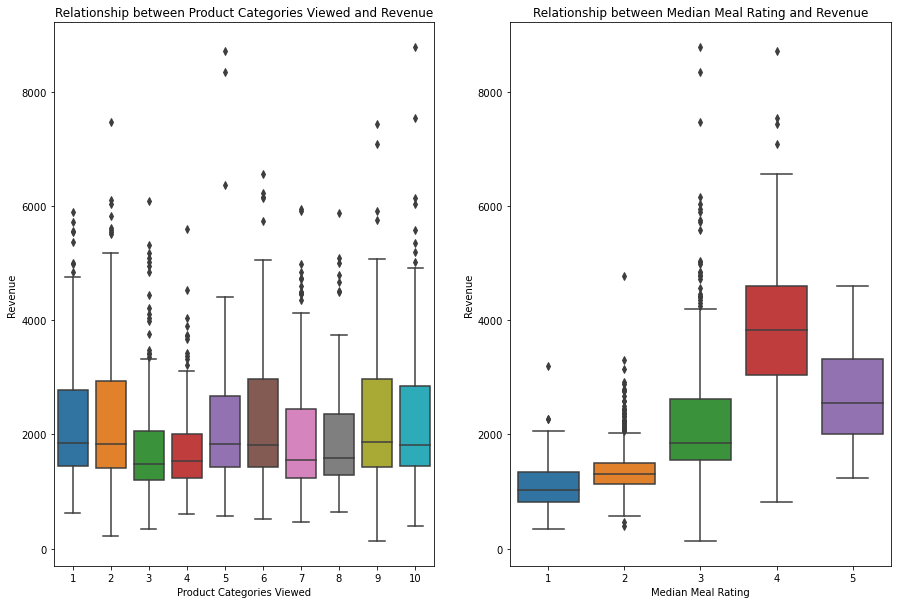

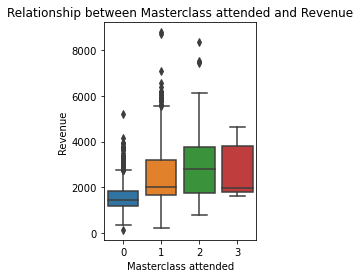


Count of Categorical Variables

----------
Product Categories Viewed
----------
1     162
2     313
3     253
4     146
5     156
6     153
7     170
8     166
9     140
10    287
Name: PRODUCT_CATEGORIES_VIEWED, dtype: int64


----------
Median Meal Rating
----------
1      99
2     487
3    1087
4     260
5      13
Name: MEDIAN_MEAL_RATING, dtype: int64


----------
Masterclass attended
----------
0    932
1    858
2    150
3      6
Name: MASTER_CLASSES_ATTENDED, dtype: int64





In [31]:
##############################################################################
"""                     Visualizing discrete variables                     """
##############################################################################
# PRODUCT_CATEGORIES_VIEWED
# MEDIAN_MEAL_RATING
# MASTER_CLASSES_ATTENDED

# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


## PRODUCT_CATEGORIES_VIEWED ##

# first plot window
plt.subplot(1, 2, 1)

# developing a boxplot
sns.boxplot(x     = 'PRODUCT_CATEGORIES_VIEWED',
            y     = 'REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Relationship between Product Categories Viewed and Revenue')
plt.xlabel(xlabel = 'Product Categories Viewed')
plt.ylabel(ylabel = 'Revenue')



## MEDIAN_MEAL_RATING ##

# second plot window
plt.subplot(1, 2, 2)


# developing a boxplot
sns.boxplot(x     = 'MEDIAN_MEAL_RATING',
            y     = 'REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Relationship between Median Meal Rating and Revenue')
plt.xlabel(xlabel = 'Median Meal Rating')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.tight_layout
plt.show()

## MASTER_CLASSES_ATTENDED ##

# second plot window
plt.subplot(1, 2, 2)


# developing a boxplot
sns.boxplot(x     = 'MASTER_CLASSES_ATTENDED',
            y     = 'REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Relationship between Masterclass attended and Revenue')
plt.xlabel(xlabel = 'Masterclass attended')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.tight_layout
plt.show()


# printing value counts for Interval variables
print(f"""
Count of Categorical Variables
==================

----------
Product Categories Viewed
----------
{apprentice['PRODUCT_CATEGORIES_VIEWED'].value_counts(normalize = False).sort_index()}


----------
Median Meal Rating
----------
{apprentice['MEDIAN_MEAL_RATING'].value_counts(normalize = False).sort_index()}


----------
Masterclass attended
----------
{apprentice['MASTER_CLASSES_ATTENDED'].value_counts(normalize = False).sort_index()}


""")

Let us check the correlation of the new transformed variables with revenue. MEDIAN_MEAL_RATING has the top correlation of 0.61. MASTER_CLASSES_ATTENDED has a correlation of 0.45.

In [32]:
##############################################################################
"""                Correlation with transformed variables                  """
##############################################################################
# We can see that the revenue for median rating is higher at a rating of 4. 
# We can also see that revenue is higher at Masterclass 2.
# developing a correlation matrix 
count_corr = apprentice.loc[ : , ['PRODUCT_CATEGORIES_VIEWED',
                              'MEDIAN_MEAL_RATING','MASTER_CLASSES_ATTENDED',
                              'REVENUE']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)
print(count_corr['REVENUE'])

# MEDIAN_MEAL_RATING has the top correlation of 0.61.
# MASTER_CLASSES_ATTENDED has a correlation of 0.45.

PRODUCT_CATEGORIES_VIEWED    0.03
MEDIAN_MEAL_RATING           0.61
MASTER_CLASSES_ATTENDED      0.45
REVENUE                      1.00
Name: REVENUE, dtype: float64


Now let us move on to the categorical features. We can start by identifying the unique values in these features.

In [33]:
##############################################################################
"""                Exploring Categorical variables                         """
##############################################################################
#CATEGORICAL/ QUALITATIVE VARIABLES
#-------------------------------------
#NAME
#EMAIL
#FIRST_NAME
#FAMILY_NAME
#Counting the values for categorical/qualitative variables
print(f"""
NAME
------
{apprentice['NAME'].value_counts()}


EMAIL
----------
{apprentice['EMAIL'].value_counts()}


FIRST_NAME
-------------
{apprentice['FIRST_NAME'].value_counts()}

FAMILY_NAME
-------------
{apprentice['FAMILY_NAME'].value_counts()}
""")


NAME
------
Goodwin                   1
Cassana Estermont         1
Clarence Crabb (Short)    1
Galladon of Morne         1
Lothor Brune              1
                         ..
Runcel Hightower          1
Qarl Quickaxe             1
Wylis Manderly            1
Hullen                    1
Edwyn Stark               1
Name: NAME, Length: 1946, dtype: int64


EMAIL
----------
monterys.velaryon@gmail.com      1
rickard.tyrell@protonmail.com    1
eldiss@amex.com                  1
rickard.stark@yahoo.com          1
elmar.frey@protonmail.com        1
                                ..
jon.lynderly@merck.com           1
donella.hornwood@passport.com    1
ardrian.celtigar@hotmail.com     1
alyssa.blackwood@live.com        1
falena.stokeworth@yahoo.com      1
Name: EMAIL, Length: 1946, dtype: int64


FIRST_NAME
-------------
Jon         21
Jeyne       14
Aegon       12
Alyn        10
Walder      10
            ..
Dunaver      1
Edwyd        1
Melaquin     1
Ardrian      1
Bharbo       1
Name

In [34]:
# Setting random seed for controlling output
rand.seed(a = 327)


We have received information from our business case that email domains have the potential to influence revenue. Hence let us identify and categorize the various emails in the dataset and call the feature as 'domain_group'. It will be a discrete variable with values '0' for junk emails, '1' for personal emails and '2' for professional emails. 

In [35]:
##############################################################################
"""                      Splitting email                                 """
##############################################################################
# Lets try to derive more meaning from the EMAIL variable

# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in apprentice.iterrows():
    
    # splitting email domain at '@'
    split_email = apprentice.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df

,0,1
0,saathos,unitedhealth.com
1,alysanne.osgrey,ge.org
2,edwyd.fossoway,jnj.com
3,eleyna.westerling,ge.org
4,elyn.norridge,jnj.com
...,...,...
1941,obara.sand,yahoo.com
1942,quentyn.blackwood,yahoo.com
1943,rhonda.rowan,gmail.com
1944,turnip,yahoo.com


In [36]:
##############################################################################
"""                      Splitting email                                 """
##############################################################################

# renaming column to concatenate
email_df.columns = ['0' , 'personal_email_domain']


# concatenating personal_email_domain with apprentice DataFrame
apprentice = pd.concat([apprentice, email_df],
                   axis = 1)


# printing value counts of personal_email_domain
apprentice.loc[: ,'personal_email_domain'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
jnj.com              28
cocacola.com         28
merck.com            28
mcdonalds.com        28
nike.com             27
apple.com            27
ge.org               26
ibm.com              26
dupont.com           26
chevron.com          25
microsoft.com        25
unitedhealth.com     24
exxon.com            24
travelers.com        24
boeing.com           23
caterpillar.com      22
pg.com               22
mmm.com              22
verizon.com          22
walmart.com          21
disney.com           21
pfizer.com           20
visa.com             20
jpmorgan.com         19
unitedtech.com       18
cisco.com            18
goldmansacs.com      18
homedepot.com        17
intel.com            17
Name: personal_email_domain, dtype: int64

In [37]:
##############################################################################
"""                      Splitting email                                 """
##############################################################################

pers_email_domains = [ '@gmail.com','@protonmail.com','@yahoo.com']



professional_email_domains  = [ '@merck.com','@mcdonalds.com','@cocacola.com',
                       '@jnj.com',  '@apple.com','@amex.com','@visa.com',
                       '@nike.com', '@dupont.com','@ge.org', '@ibm.com',
                         '@microsoft.com','@chevron.com','@travelers.com',
                            '@unitedhealth.com','@exxon.com', '@boeing.com','@mmm.com', '@pg.com',
                       '@caterpillar.com', '@verizon.com','@disney.com', '@walmart.com',
                         '@pfizer.com','@jpmorgan.com', '@cisco.com',
                         '@unitedtech.com', '@goldmansacs.com','@intel.com', 
                          '@homedepot.com']


junk_email_domains = ['@passport.com','@me.com','@msn.com',
                       '@aol.com','@hotmail.com','@live.com']
# placeholder list
placeholder_lst = []

# Lets create a dummy variable to differentiate between normal email domains
# and different email domains
# looping to group observations by domain type
for domain in apprentice['personal_email_domain']:
        if '@'+ domain in junk_email_domains:
            placeholder_lst.append(0)
            
        elif '@'+ domain in pers_email_domains:
            placeholder_lst.append(1)
        elif '@'+ domain in professional_email_domains:
            placeholder_lst.append(2)
        elif '@'+ domain in gmail:
            placeholder_lst.append(3)
                  
        else:
            print('Unknown')


# concatenating with original DataFrame
apprentice['domain_group'] = pd.Series(placeholder_lst)


# checking results
apprentice['domain_group'].value_counts()

1    861
2    696
0    389
Name: domain_group, dtype: int64

We will try to derive more meaning from the FIRST_NAME feature by guessing their gender. We will create a new binary feature for knowing the gender of a customer. 

In [ ]:
##############################################################################
"""                      Guessing Gender                                   """
##############################################################################
# Gender Guessing
# guessing gender based on (given) name

# placeholder list
#placeholder_lst = []

# looping to guess gender
#for name in apprentice.loc[:,'FIRST_NAME']:
  #  guess = gender.Detector().get_gender(name)
   # placeholder_lst.append(guess)


# converting list into a series
#apprentice['gender_guess'] = pd.Series(placeholder_lst)


# checking results
#apprentice['gender_guess'].value_counts()

#Creating a list with known male as 1, female as 2 and unknown gender as 0
#placeholder_lst = []

#for val in apprentice['gender_guess']:
  #  if val == 'unknown' or val == 'andy':
   #     placeholder_lst.append(0)
  #  elif val == 'male' or val == 'mostly_male':
  #      placeholder_lst.append(1)
  #  elif val == 'female' or val == 'mostly_female':
  #      placeholder_lst.append(2)
  #  else:
  #      print('Unknown')
   

#print(placeholder_lst)

In [38]:
##############################################################################
"""                      Guessing Gender                                   """
##############################################################################
# Gender Guessing Part 2
# Known and unknown gender list from gender guesser 
placeholder_lst = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 
                   1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 
                   0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 
                   0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 
                   1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 
                   1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 
                   0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 
                   0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 
                   0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 
                   1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 
                   0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
                   0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 
                   0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 
                   0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,                    
                   1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 
                   1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 
                   0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 
                   0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
                   0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 
                   0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
                   0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 
                   0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 
                   0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 
                   1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,                   
                   1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                   0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 
                   0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 
                   0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
                   0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
                   0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 
                   0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 
                   0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 
                   1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 
                   1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 
                   1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 
                   0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 
                   0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 
                   0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 
                   0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 
                   1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 
                   0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 
                   1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 
                   0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 
                   1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 
                   0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 
                   0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 
                   0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 
                   0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
                   0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 
                   0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 
                   0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 
                   0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
                   0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 
                   1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 
                   0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 
                   0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 
                   1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 
                   1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
                   1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 
                   1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
                   1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
                   1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
                   1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 
                   0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 
                   0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
                   0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
                   0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
                   1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
                   1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
                   1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
                   0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
                   0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
                   0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
                   0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
                   0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                   1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                   0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
                   0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
                   0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
                   0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
                   0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
                   0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 
                   1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 
                   0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
                   0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
                   0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 
                   0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
                   0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
                   0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
                   1, 0, 0, 1, 0, 0]
# Creating a new feature for Known and Unknown genders
apprentice['GENDER_KNOWN'] = pd.Series(placeholder_lst)
apprentice['GENDER_KNOWN'].value_counts()

0    1395
1     551
Name: GENDER_KNOWN, dtype: int64

Let us create another feature which measures the number of names in each customer's full name.

In [39]:
##############################################################################
"""                      Length of name                                   """
##############################################################################
# Creating a variables with the length of each customer's name
text_split_feature(col = 'NAME', df = apprentice, sep = ' ', new_col_name ='NUMBER_OF_NAMES')


Finally, let us check the correlation with all the features that we have created.

In [40]:
##############################################################################
"""                        Correlation                                     """
##############################################################################
# creating a (Pearson) correlation matrix
df_corr = apprentice.corr().round(2)


# printing (Pearson) correlations with SalePrice
print(df_corr.loc['REVENUE'].sort_values(ascending = False))

REVENUE                          1.00
log_REVENUE                      0.95
AVG_PREP_VID_TIME                0.64
log_TOTAL_MEALS_ORDERED          0.61
MEDIAN_MEAL_RATING               0.61
TOTAL_MEALS_ORDERED              0.60
TOTAL_PHOTOS_VIEWED              0.47
MASTER_CLASSES_ATTENDED          0.45
AVERAGE_ORDER_SIZE               0.44
Unnamed: 0                       0.43
has_TOTAL_PHOTOS_VIEWED          0.37
log_AVG_TIME_PER_SITE_VISIT      0.15
AVG_TIME_PER_SITE_VISIT          0.14
CONTACTS_W_CUSTOMER_SERVICE      0.10
NUMBER_OF_NAMES                  0.04
GENDER_KNOWN                     0.03
MOBILE_NUMBER                    0.03
PRODUCT_CATEGORIES_VIEWED        0.03
has_CANCELLATIONS_BEFORE_NOON    0.02
domain_group                     0.02
PC_LOGINS                        0.02
has_MOBILE_LOGINS                0.01
CANCELLATIONS_BEFORE_NOON        0.01
WEEKLY_PLAN                      0.01
TASTES_AND_PREFERENCES           0.01
has_EARLY_DELIVERIES             0.01
CROSS_SELL_S

## Building Predictive Models

Now our dataset is ready for building models. We shall split the data into training and testing sets. We will build our model on the training set. We shall split the data twice. The first training-testing set will contain only statistically significant features, i.e, they have a p-value below 0.05. The second training-testing set will contain all the features of the dataset. We will use Revenue and log of Revenue as our dependent variables. 

In [41]:
#############################################################################
##################### Train/test split for Y and Log y models ###############
#############################################################################

# applying modelin scikit-learn
apprentice_x_variables = ['CROSS_SELL_SUCCESS','TOTAL_MEALS_ORDERED',
                          'UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE',
                          'TASTES_AND_PREFERENCES',
                          'AVG_PREP_VID_TIME','AVERAGE_ORDER_SIZE',
                          'MASTER_CLASSES_ATTENDED','MEDIAN_MEAL_RATING',
                          'has_TOTAL_PHOTOS_VIEWED','has_CANCELLATIONS_AFTER_NOON',
                          'log_AVG_TIME_PER_SITE_VISIT','domain_group','NUMBER_OF_NAMES','AVG_CLICKS_PER_VISIT']

apprentice_data = apprentice.drop(['NAME','EMAIL','FIRST_NAME','FAMILY_NAME',
                                   '0','personal_email_domain','REVENUE',
                                   'log_REVENUE'],axis=1)
# preparing x-variables from the OLS model 
ols_data = apprentice.loc[ :, apprentice_x_variables]


# preparing response variable
apprentice_target = apprentice.loc[:,'REVENUE']
log_apprentice_target = apprentice.loc[:,'log_REVENUE']

###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            apprentice_data,     # x-variables
            apprentice_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            apprentice_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

# FULL X-dataset (log Y)
l_x_train_FULL, l_x_test_FULL, l_y_train_FULL, l_y_test_FULL = train_test_split(
            apprentice_data,     # x-variables
            log_apprentice_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (log Y)
l_x_train_OLS, l_x_test_OLS, l_y_train_OLS, l_y_test_OLS = train_test_split(
            ols_data,         # x-variables
            log_apprentice_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

1) For our first model, we will run a linear regression having statistically significant features and Revenue as our dependent variable. 

In [42]:
#############################################################################
######### MODEL: OLS REGRESSION WITH NORMAL Y ############################
#############################################################################
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

# saving scoring data for future use
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4) # using R-square
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)   # using R-square

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.6293
OLS Testing Score  : 0.6551
OLS Train-Test Gap : 0.0258


In [43]:
#############################################################################
### MODEL: OLS REGRESSION WITH NORMAL Y (Intercepts and Coefficients)#####
#############################################################################

# zipping each feature name to its coefficient
lr_model_values = zip(apprentice_data[apprentice_x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 595.83)
('CROSS_SELL_SUCCESS', -107.94)
('TOTAL_MEALS_ORDERED', 6.14)
('UNIQUE_MEALS_PURCH', -63.7)
('CONTACTS_W_CUSTOMER_SERVICE', 41.59)
('TASTES_AND_PREFERENCES', 37.77)
('AVG_PREP_VID_TIME', 9.31)
('AVERAGE_ORDER_SIZE', -85.6)
('MASTER_CLASSES_ATTENDED', 179.03)
('MEDIAN_MEAL_RATING', 311.25)
('has_TOTAL_PHOTOS_VIEWED', 157.54)
('has_CANCELLATIONS_AFTER_NOON', -31.86)
('log_AVG_TIME_PER_SITE_VISIT', -370.84)
('domain_group', 32.51)
('NUMBER_OF_NAMES', 42.26)
('AVG_CLICKS_PER_VISIT', -25.25)


2) For our second model, we will run a linear regression having statistically significant features and log of Revenue as our dependent variable.

In [44]:
#############################################################################
######### MODEL: OLS REGRESSION WITH LOG Y ###############################
#############################################################################

# INSTANTIATING a model object for log y variable
l_lr = LinearRegression()


# FITTING to the training data
l_lr_fit = l_lr.fit(l_x_train_OLS, l_y_train_OLS)


# PREDICTING on new data
l_lr_pred = l_lr_fit.predict(l_x_test_OLS)


# SCORING the results
print('Log OLS Training Score :', l_lr.score(l_x_train_OLS, l_y_train_OLS).round(4))  # using R-square
print('Log OLS Testing Score  :',  l_lr.score(l_x_test_OLS, l_y_test_OLS).round(4)) # using R-square

# saving scoring data for future use
l_lr_train_score = l_lr.score(l_x_train_OLS, l_y_train_OLS).round(4) # using R-square
l_lr_test_score  = l_lr.score(l_x_test_OLS, l_y_test_OLS).round(4)   # using R-square

# displaying and saving the gap between training and testing
print('Log OLS Train-Test Gap :', abs(l_lr_train_score - l_lr_test_score).round(4))
l_lr_test_gap = abs(l_lr_train_score - l_lr_test_score).round(4)

Log OLS Training Score : 0.6668
Log OLS Testing Score  : 0.6802
Log OLS Train-Test Gap : 0.0134


In [45]:
#############################################################################
######### MODEL: OLS REGRESSION WITH LOG Y (Intercepts and coefficients)###
#############################################################################
# zipping each feature name to its coefficient for log model
l_lr_model_values = zip(apprentice_data[apprentice_x_variables].columns,
                      l_lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
l_lr_model_lst = [('intercept', l_lr_fit.intercept_.round(decimals = 4))]


# printing out each feature-coefficient pair one by one
for val in l_lr_model_values:
    l_lr_model_lst.append(val)
    

# checking the results
for pair in l_lr_model_lst:
    print(pair)

('intercept', 2.9872)
('CROSS_SELL_SUCCESS', -0.02)
('TOTAL_MEALS_ORDERED', 0.0)
('UNIQUE_MEALS_PURCH', -0.01)
('CONTACTS_W_CUSTOMER_SERVICE', -0.0)
('TASTES_AND_PREFERENCES', 0.01)
('AVG_PREP_VID_TIME', 0.0)
('AVERAGE_ORDER_SIZE', -0.01)
('MASTER_CLASSES_ATTENDED', 0.04)
('MEDIAN_MEAL_RATING', 0.08)
('has_TOTAL_PHOTOS_VIEWED', 0.04)
('has_CANCELLATIONS_AFTER_NOON', -0.01)
('log_AVG_TIME_PER_SITE_VISIT', -0.07)
('domain_group', 0.0)
('NUMBER_OF_NAMES', 0.01)
('AVG_CLICKS_PER_VISIT', -0.0)


3) For our third model, we will run a lasso regression having all features and Revenue as our dependent variable.

In [46]:
#############################################################################
######### MODEL: LASSO REGRESSION WITH NORMAL Y ##########################
#############################################################################

# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.6283
Lasso Testing Score  : 0.6537
Lasso Train-Test Gap : 0.0254


In [49]:
#############################################################################
### MODEL: LASSO REGRESSION WITH NORMAL Y (Intercepts and Coefficients)####
#############################################################################
# zipping each feature name to its coefficient
lasso_model_values = zip(apprentice_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 293.0)
('Unnamed: 0', 0.0)
('CROSS_SELL_SUCCESS', -0.0)
('TOTAL_MEALS_ORDERED', 2.33)
('UNIQUE_MEALS_PURCH', -45.64)
('CONTACTS_W_CUSTOMER_SERVICE', 46.23)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('AVG_TIME_PER_SITE_VISIT', -0.0)
('MOBILE_NUMBER', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('CANCELLATIONS_AFTER_NOON', -0.0)
('TASTES_AND_PREFERENCES', 0.0)
('PC_LOGINS', -0.0)
('MOBILE_LOGINS', -0.0)
('WEEKLY_PLAN', 0.0)
('EARLY_DELIVERIES', -0.0)
('LATE_DELIVERIES', 0.0)
('PACKAGE_LOCKER', -0.0)
('REFRIGERATED_LOCKER', -0.0)
('AVG_PREP_VID_TIME', 6.09)
('AVERAGE_ORDER_SIZE', -0.0)
('MASTER_CLASSES_ATTENDED', 144.94)
('MEDIAN_MEAL_RATING', 248.29)
('AVG_CLICKS_PER_VISIT', -0.0)
('TOTAL_PHOTOS_VIEWED', 0.61)
('m_FAMILY_NAME', -0.0)
('has_CANCELLATIONS_BEFORE_NOON', 0.0)
('has_CANCELLATIONS_AFTER_NOON', -0.0)
('has_MOBILE_LOGINS', -0.0)
('has_EARLY_DELIVERIES', -0.0)
('has_LATE_DELIVERIES', 0.0)
('has_TOTAL_PHOTOS_VIEWED', 0.0)
('log_AVG_TIME_PER_SITE_VISIT', -188.15)
('log_TOTAL_MEA

In [55]:
#############################################################################
### MODEL: LASSO REGRESSION WITH NORMAL Y (Intercepts and Coefficients)####
#############################################################################

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 293.0)
('TOTAL_MEALS_ORDERED', 2.33)
('UNIQUE_MEALS_PURCH', -45.64)
('CONTACTS_W_CUSTOMER_SERVICE', 46.23)
('AVG_PREP_VID_TIME', 6.09)
('MASTER_CLASSES_ATTENDED', 144.94)
('MEDIAN_MEAL_RATING', 248.29)
('TOTAL_PHOTOS_VIEWED', 0.61)
('log_AVG_TIME_PER_SITE_VISIT', -188.15)
('log_TOTAL_MEALS_ORDERED', 675.04)
('log_AVG_CLICKS_PER_VISIT', -945.68)


4) For our fourth model, we will run a lasso regression having statistically significant features and Revenue as our dependent variable.

In [56]:
#############################################################################
######### MODEL: LASSO REGRESSION WITH NORMAL Y and OLS data#################
#############################################################################

# INSTANTIATING a model object
ols_lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
ols_lasso_fit = ols_lasso_model.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
ols_lasso_pred = ols_lasso_fit.predict(x_test_OLS)


# SCORING the results
print('Lasso Training Score (OLS Data) :', ols_lasso_model.score(x_train_OLS, y_train_OLS).round(4))
print('Lasso Testing Score (OLS Data)  :', ols_lasso_model.score(x_test_OLS, y_test_OLS).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
ols_lasso_train_score = ols_lasso_model.score(x_train_OLS, y_train_OLS).round(4) # using R-square
ols_lasso_test_score  = ols_lasso_model.score(x_test_OLS, y_test_OLS).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap(OLS Data) :', abs(ols_lasso_train_score - ols_lasso_test_score).round(4))
ols_lasso_test_gap = abs(ols_lasso_train_score - ols_lasso_test_score).round(4)

Lasso Training Score (OLS Data) : 0.6154
Lasso Testing Score (OLS Data)  : 0.6369
Lasso Train-Test Gap(OLS Data) : 0.0215


In [57]:
#############################################################################
### MODEL: LASSO REGRESSION WITH NORMAL Y OLS (Intercepts and Coefficients)####
#############################################################################
# zipping each feature name to its coefficient
ols_lasso_model_values = zip(apprentice_data.columns, ols_lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
ols_lasso_model_lst = [('intercept', ols_lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ols_lasso_model_values:
    ols_lasso_model_lst.append(val)
    

# checking the results
for pair in ols_lasso_model_lst:
    print(pair)

('intercept', 240.98)
('Unnamed: 0', -0.0)
('CROSS_SELL_SUCCESS', 5.69)
('TOTAL_MEALS_ORDERED', -49.95)
('UNIQUE_MEALS_PURCH', 27.79)
('CONTACTS_W_CUSTOMER_SERVICE', 0.0)
('PRODUCT_CATEGORIES_VIEWED', 6.83)
('AVG_TIME_PER_SITE_VISIT', -0.0)
('MOBILE_NUMBER', 157.86)
('CANCELLATIONS_BEFORE_NOON', 320.66)
('CANCELLATIONS_AFTER_NOON', 111.11)
('TASTES_AND_PREFERENCES', -0.0)
('PC_LOGINS', -176.4)
('MOBILE_LOGINS', 0.0)
('WEEKLY_PLAN', 0.0)
('EARLY_DELIVERIES', -17.95)


In [61]:
#############################################################################
### MODEL: LASSO REGRESSION WITH NORMAL Y OLS data(Intercepts and Coefficients)
#############################################################################

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ols_lasso_model_lst:
        
        if coefficient == 0:
            ols_lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ols_lasso_model_lst:
    print(pair)

('intercept', 240.98)
('CROSS_SELL_SUCCESS', 5.69)
('TOTAL_MEALS_ORDERED', -49.95)
('UNIQUE_MEALS_PURCH', 27.79)
('PRODUCT_CATEGORIES_VIEWED', 6.83)
('MOBILE_NUMBER', 157.86)
('CANCELLATIONS_BEFORE_NOON', 320.66)
('CANCELLATIONS_AFTER_NOON', 111.11)
('PC_LOGINS', -176.4)
('EARLY_DELIVERIES', -17.95)


5) For our fifth model, we will run a ARD regression having all features and Revenue as our dependent variable.

In [62]:
#############################################################################
### MODEL: ARD REGRESSION WITH NORMAL Y ###################################
#############################################################################

# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.6457
Testing Score : 0.6733
ARD Train-Test Gap : 0.0276


In [63]:
#############################################################################
### MODEL: ARD REGRESSION WITH NORMAL Y (Intercepts and Coefficients#######
#############################################################################
# zipping each feature name to its coefficient
ard_model_values = zip(apprentice_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 3117.28)
('Unnamed: 0', 0.11779)
('CROSS_SELL_SUCCESS', -66.04916)
('TOTAL_MEALS_ORDERED', 1.25388)
('UNIQUE_MEALS_PURCH', -57.6245)
('CONTACTS_W_CUSTOMER_SERVICE', 67.971)
('PRODUCT_CATEGORIES_VIEWED', 2.64527)
('AVG_TIME_PER_SITE_VISIT', 0.00345)
('MOBILE_NUMBER', 0.001)
('CANCELLATIONS_BEFORE_NOON', 0.0003)
('CANCELLATIONS_AFTER_NOON', -0.00041)
('TASTES_AND_PREFERENCES', 30.17909)
('PC_LOGINS', -0.00057)
('MOBILE_LOGINS', -25.22128)
('WEEKLY_PLAN', 0.00076)
('EARLY_DELIVERIES', -0.00037)
('LATE_DELIVERIES', 0.00192)
('PACKAGE_LOCKER', -8.18349)
('REFRIGERATED_LOCKER', -0.00246)
('AVG_PREP_VID_TIME', 8.11708)
('AVERAGE_ORDER_SIZE', -110.11818)
('MASTER_CLASSES_ATTENDED', 159.81793)
('MEDIAN_MEAL_RATING', 251.16779)
('AVG_CLICKS_PER_VISIT', 149.82249)
('TOTAL_PHOTOS_VIEWED', 0.68084)
('m_FAMILY_NAME', -50.15822)
('has_CANCELLATIONS_BEFORE_NOON', 42.29989)
('has_CANCELLATIONS_AFTER_NOON', -0.00079)
('has_MOBILE_LOGINS', 0.00035)
('has_EARLY_DELIVERIES', -0.00049)
('has_L

In [68]:
#############################################################################
### MODEL: ARD REGRESSION WITH NORMAL Y (Intercepts and Coefficients#######
#############################################################################
# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 3117.28)
('Unnamed: 0', 0.11779)
('CROSS_SELL_SUCCESS', -66.04916)
('TOTAL_MEALS_ORDERED', 1.25388)
('UNIQUE_MEALS_PURCH', -57.6245)
('CONTACTS_W_CUSTOMER_SERVICE', 67.971)
('PRODUCT_CATEGORIES_VIEWED', 2.64527)
('AVG_TIME_PER_SITE_VISIT', 0.00345)
('MOBILE_NUMBER', 0.001)
('CANCELLATIONS_BEFORE_NOON', 0.0003)
('CANCELLATIONS_AFTER_NOON', -0.00041)
('TASTES_AND_PREFERENCES', 30.17909)
('PC_LOGINS', -0.00057)
('MOBILE_LOGINS', -25.22128)
('WEEKLY_PLAN', 0.00076)
('EARLY_DELIVERIES', -0.00037)
('LATE_DELIVERIES', 0.00192)
('PACKAGE_LOCKER', -8.18349)
('REFRIGERATED_LOCKER', -0.00246)
('AVG_PREP_VID_TIME', 8.11708)
('AVERAGE_ORDER_SIZE', -110.11818)
('MASTER_CLASSES_ATTENDED', 159.81793)
('MEDIAN_MEAL_RATING', 251.16779)
('AVG_CLICKS_PER_VISIT', 149.82249)
('TOTAL_PHOTOS_VIEWED', 0.68084)
('m_FAMILY_NAME', -50.15822)
('has_CANCELLATIONS_BEFORE_NOON', 42.29989)
('has_CANCELLATIONS_AFTER_NOON', -0.00079)
('has_MOBILE_LOGINS', 0.00035)
('has_EARLY_DELIVERIES', -0.00049)
('has_L

6) For our sixth model, we will run a ARD regression having all features and log of Revenue as our dependent variable.

In [69]:
#############################################################################
### MODEL: ARD REGRESSION WITH LOG Y ####################################
#############################################################################

# INSTANTIATING a model object for log y
l_ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
l_ard_fit = l_ard_model.fit(l_x_train_FULL, l_y_train_FULL)


# PREDICTING on new data
l_ard_pred = l_ard_fit.predict(l_x_test_FULL)


print('Log ARD Training Score:', l_ard_model.score(l_x_train_FULL, l_y_train_FULL).round(4))
print('Log ARD Testing Score :',  l_ard_model.score(l_x_test_FULL, l_y_test_FULL).round(4))


# saving scoring data for future use
l_ard_train_score = l_ard_model.score(l_x_train_FULL, l_y_train_FULL).round(4)
l_ard_test_score  = l_ard_model.score(l_x_test_FULL, l_y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print(' Log ARD Train-Test Gap :', abs(l_ard_train_score - l_ard_test_score).round(4))
l_ard_test_gap = abs(l_ard_train_score - l_ard_test_score).round(4)

Log ARD Training Score: 0.6562
Log ARD Testing Score : 0.6522
 Log ARD Train-Test Gap : 0.004


In [70]:
#############################################################################
### MODEL: ARD REGRESSION WITH LOG Y (Intercepts and Coefficients)#########
#############################################################################
# zipping each feature name to its coefficient for log
l_ard_model_values = zip(apprentice_data.columns, l_ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
l_ard_model_lst = [('intercept', l_ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in l_ard_model_values:
    l_ard_model_lst.append(val)
    

# checking the results
for pair in l_ard_model_lst:
    print(pair)

('intercept', 2.83)
('Unnamed: 0', 0.0)
('CROSS_SELL_SUCCESS', -0.01105)
('TOTAL_MEALS_ORDERED', 0.0)
('UNIQUE_MEALS_PURCH', -0.01075)
('CONTACTS_W_CUSTOMER_SERVICE', 0.0)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('AVG_TIME_PER_SITE_VISIT', 0.0)
('MOBILE_NUMBER', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('CANCELLATIONS_AFTER_NOON', 0.0)
('TASTES_AND_PREFERENCES', 0.0)
('PC_LOGINS', 0.0)
('MOBILE_LOGINS', 0.0)
('WEEKLY_PLAN', 0.0)
('EARLY_DELIVERIES', 0.0)
('LATE_DELIVERIES', 0.0)
('PACKAGE_LOCKER', -0.01217)
('REFRIGERATED_LOCKER', 0.0)
('AVG_PREP_VID_TIME', 0.0)
('AVERAGE_ORDER_SIZE', 0.01863)
('MASTER_CLASSES_ATTENDED', 0.05459)
('MEDIAN_MEAL_RATING', 0.07163)
('AVG_CLICKS_PER_VISIT', 0.0)
('TOTAL_PHOTOS_VIEWED', 0.0)
('m_FAMILY_NAME', 0.0)
('has_CANCELLATIONS_BEFORE_NOON', 0.0)
('has_CANCELLATIONS_AFTER_NOON', 0.0)
('has_MOBILE_LOGINS', 0.0)
('has_EARLY_DELIVERIES', 0.0)
('has_LATE_DELIVERIES', 0.0)
('has_TOTAL_PHOTOS_VIEWED', 0.032)
('log_AVG_TIME_PER_SITE_VISIT', -0.06465)
('log_TOTAL_ME

In [71]:
#############################################################################
### MODEL: ARD REGRESSION WITH LOG Y (Intercepts and Coefficients)#########
#############################################################################
# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in l_ard_model_lst:
        
        if coefficient == 0:
            l_ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in l_ard_model_lst:
    print(pair)

('intercept', 2.83)
('CROSS_SELL_SUCCESS', -0.01105)
('UNIQUE_MEALS_PURCH', -0.01075)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('MOBILE_NUMBER', 0.0)
('CANCELLATIONS_AFTER_NOON', 0.0)
('PC_LOGINS', 0.0)
('WEEKLY_PLAN', 0.0)
('LATE_DELIVERIES', 0.0)
('PACKAGE_LOCKER', -0.01217)
('AVG_PREP_VID_TIME', 0.0)
('AVERAGE_ORDER_SIZE', 0.01863)
('MASTER_CLASSES_ATTENDED', 0.05459)
('MEDIAN_MEAL_RATING', 0.07163)
('TOTAL_PHOTOS_VIEWED', 0.0)
('has_CANCELLATIONS_BEFORE_NOON', 0.0)
('has_MOBILE_LOGINS', 0.0)
('has_LATE_DELIVERIES', 0.0)
('has_TOTAL_PHOTOS_VIEWED', 0.032)
('log_AVG_TIME_PER_SITE_VISIT', -0.06465)
('log_TOTAL_MEALS_ORDERED', 0.27279)
('log_AVG_CLICKS_PER_VISIT', -0.16647)
('GENDER_KNOWN', 0.0)


7) For our seventh model, we will run a ARD regression having statistically significant features and Revenue as our dependent variable.

In [72]:
#############################################################################
### MODEL: ARD REGRESSION WITH NORMAL Y OLS data##############################
#############################################################################

# INSTANTIATING a model object
ols_ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ols_ard_fit = ols_ard_model.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
ols_ard_pred = ols_ard_fit.predict(x_test_OLS)


print('Training Score:', ols_ard_model.score(x_train_OLS, y_train_OLS).round(4))
print('Testing Score :',  ols_ard_model.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
ols_ard_train_score = ols_ard_model.score(x_train_OLS, y_train_OLS).round(4)
ols_ard_test_score  = ols_ard_model.score(x_test_OLS, y_test_OLS).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap OLS Data:', abs(ols_ard_train_score - ols_ard_test_score).round(4))
ols_ard_test_gap = abs(ols_ard_train_score - ols_ard_test_score).round(4)

Training Score: 0.6284
Testing Score : 0.6547
ARD Train-Test Gap OLS Data: 0.0263


In [73]:
#############################################################################
### MODEL: ARD REGRESSION WITH NORMAL Y OLS data(Intercepts and Coefficients#######
#############################################################################
# zipping each feature name to its coefficient
ols_ard_model_values = zip(apprentice_data.columns, ols_ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ols_ard_model_lst = [('intercept', ols_ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ols_ard_model_values:
    ols_ard_model_lst.append(val)
    

# checking the results
for pair in ols_ard_model_lst:
    print(pair)

('intercept', 492.98)
('Unnamed: 0', -68.58261)
('CROSS_SELL_SUCCESS', 6.11517)
('TOTAL_MEALS_ORDERED', -63.06463)
('UNIQUE_MEALS_PURCH', 40.38655)
('CONTACTS_W_CUSTOMER_SERVICE', 0.00307)
('PRODUCT_CATEGORIES_VIEWED', 9.22514)
('AVG_TIME_PER_SITE_VISIT', -79.67934)
('MOBILE_NUMBER', 175.75042)
('CANCELLATIONS_BEFORE_NOON', 328.58982)
('CANCELLATIONS_AFTER_NOON', 148.59499)
('TASTES_AND_PREFERENCES', -0.00106)
('PC_LOGINS', -354.86371)
('MOBILE_LOGINS', 3.20437)
('WEEKLY_PLAN', 23.13569)
('EARLY_DELIVERIES', -18.96102)


In [74]:
#############################################################################
### MODEL : ARD REGRESSION WITH NORMAL Y  OLS data(Intercepts and Coefficients#
#############################################################################
# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ols_ard_model_lst:
        
        if coefficient == 0:
            ols_ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ols_ard_model_lst:
    print(pair)

('intercept', 492.98)
('Unnamed: 0', -68.58261)
('CROSS_SELL_SUCCESS', 6.11517)
('TOTAL_MEALS_ORDERED', -63.06463)
('UNIQUE_MEALS_PURCH', 40.38655)
('CONTACTS_W_CUSTOMER_SERVICE', 0.00307)
('PRODUCT_CATEGORIES_VIEWED', 9.22514)
('AVG_TIME_PER_SITE_VISIT', -79.67934)
('MOBILE_NUMBER', 175.75042)
('CANCELLATIONS_BEFORE_NOON', 328.58982)
('CANCELLATIONS_AFTER_NOON', 148.59499)
('TASTES_AND_PREFERENCES', -0.00106)
('PC_LOGINS', -354.86371)
('MOBILE_LOGINS', 3.20437)
('WEEKLY_PLAN', 23.13569)
('EARLY_DELIVERIES', -18.96102)


In [49]:
# comparing results
# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD','Log OLS','Log ARD','Lasso(OLS data)',
                      'ARD(OLS data)'],
           
    'Training' : [lr_train_score, lasso_train_score,
                  ard_train_score,l_lr_train_score,
                  l_ard_train_score,
                  ols_lasso_train_score,
                  ols_ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                  ard_test_score,l_lr_test_score, 
                  l_ard_test_score,
                 ols_lasso_test_score,
                  ols_ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                        ard_test_gap,l_lr_test_gap, 
                        l_ard_test_gap,
                       ols_lasso_test_gap,
                        ols_ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                    len(ard_model_lst),len(l_lr_model_lst),
                   len(l_ard_model_lst),len(ols_lasso_model_lst),
                     len(ols_ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst,l_lr_model_lst, 
               l_ard_model_lst,ols_lasso_model_lst, ols_ard_model_lst]}

final_models = pd.DataFrame(model_performance)



print("""Conclusion: Choosing Log OLS model as the final model which has a testing
            R Square of 0.6761. It was an OLS regression using scikit learn and had
            log of revenue as the dependant variable.""")
final_models.head(n=10)

Conclusion: Choosing Log OLS model as the final model which has a testing
            R Square of 0.6761. It was an OLS regression using scikit learn and had
            log of revenue as the dependant variable.


,Model Type,Training,Testing,Train-Test Gap,Model Size,Model
0,OLS,0.6293,0.6551,0.0258,16,"[(intercept, 595.83), (CROSS_SELL_SUCCESS, -10..."
1,Lasso,0.6206,0.6416,0.0210,21,"[(intercept, 345.76), (CROSS_SELL_SUCCESS, -0...."
2,ARD,0.6361,0.6555,0.0194,36,"[(intercept, 664.0), (Unnamed: 0, 0.20165), (C..."
3,Log OLS,0.6668,0.6802,0.0134,16,"[(intercept, 2.99), (CROSS_SELL_SUCCESS, -0.02..."
4,Log ARD,0.5384,0.5361,0.0023,21,"[(intercept, 2.85), (CROSS_SELL_SUCCESS, 0.0),..."
5,Lasso(OLS data),0.6154,0.6369,0.0215,11,"[(intercept, 240.98), (CROSS_SELL_SUCCESS, 5.6..."
6,ARD(OLS data),0.6284,0.6547,0.0263,16,"[(intercept, 492.98), (Unnamed: 0, -68.58261),..."


## Conclusion

We can see that the Log OLS model has performed the best with a testing R square of 0.6802. This model had the log of revenue as the dependent variable. It was built on statistically significant independent variables. The method used was Linear Regression. From our analysis this would be the best model for predicting revenue.  